# 3 Datenprüfung

In [37]:
#Löschen aller Variablen
%reset -f 

In [38]:
#Laden Libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

from google.colab import drive

In [39]:
#Konfiguration
%matplotlib inline

In [40]:
#Version 
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)

In [41]:
pd.__version__

'1.3.5'

In [42]:
matplotlib.__version__

'3.2.2'

In [43]:
plotly.__version__

'5.5.0'

In [44]:
#Verbindung zu GoogleDrive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [45]:
# Liste mit Tabellen 
!ls "/content/gdrive/Shareddrives/Studie Breast Cancer/breast_cancer/"

BreastCancerDB.db  disease.xlsx		organizations.xlsx
careplans.csv	   encounters.csv	patients.csv
careplans.xlsx	   imaging_studies.csv	patients.xlsx
conditions.csv	   immunizations.csv	payers.csv
conditions.xlsx    medications.csv	payer_transitions.csv
devices.csv	   observations.csv	procedures.csv
devices.xlsx	   observations.xlsx	providers.csv
disease.csv	   organizations.csv	supplies.csv


In [46]:
# Laden Daten 
patient = pd.read_csv('/content/gdrive/My Drive/Studie/breast_cancer/patients.csv', sep=",")
condition = pd.read_csv( '/content/gdrive/My Drive/Studie/breast_cancer/conditions.csv', sep=",")
medication = pd.read_csv('/content/gdrive/My Drive/Studie/breast_cancer/medications.csv', sep=",")
observation = pd.read_csv('/content/gdrive/My Drive/Studie/breast_cancer/observations.csv', sep=",")
procedure = pd.read_csv('/content/gdrive/My Drive/Studie/breast_cancer/procedures.csv', sep=",")

# 3.1 Auf ungültige Werte prüfen

Anzahl ungültiger Werte in 'patient'

 Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 165
PASSPORT                216
PREFIX                  188
FIRST                     0
LAST                      0
SUFFIX                 1004
MAIDEN                  739
MARITAL                 330
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     464
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64 



Anzahl ungültiger Werte in 'condition'

 START            0
STOP           222
PATIENT          0
ENCOUNTER        0
CODE             0
DESCRIPTION      0
dtype: int64 



Anzahl ungültiger Werte in 'medication'

 START                  0
STOP 

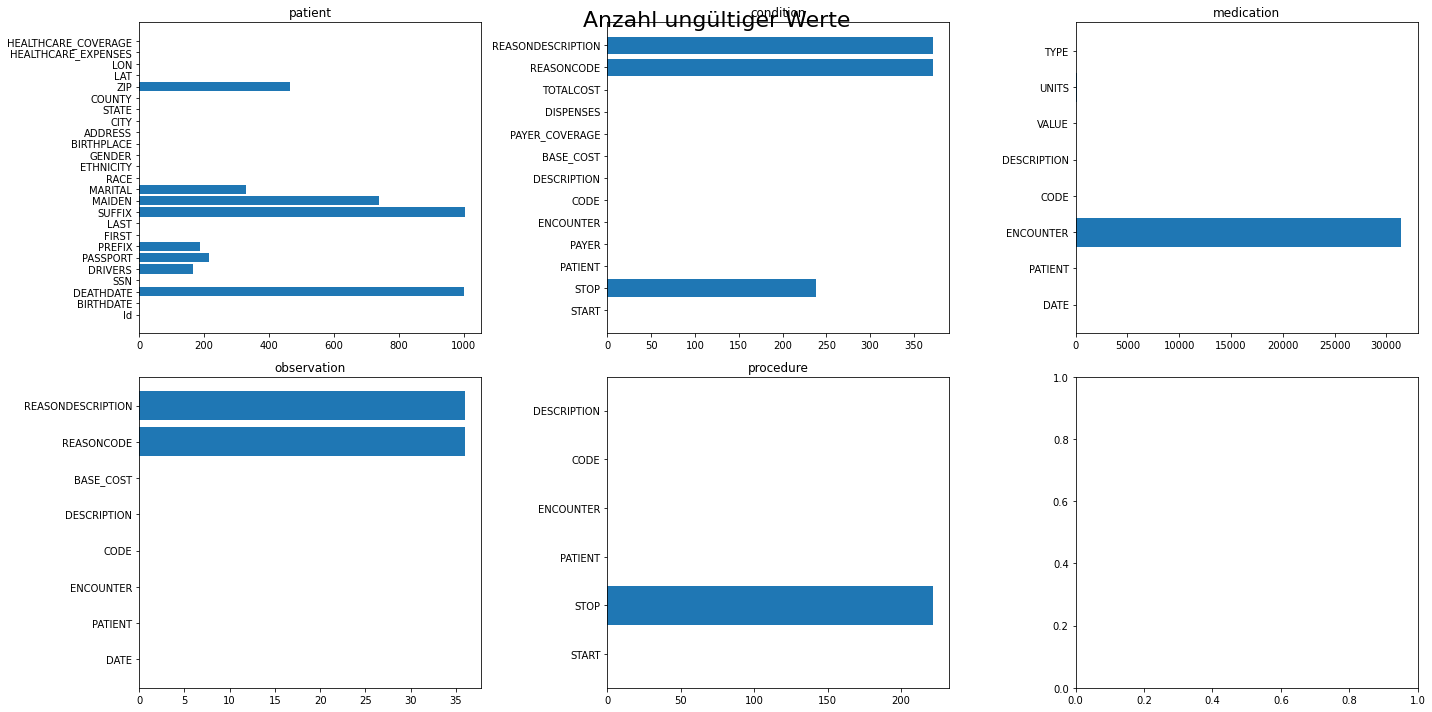

In [47]:
print("Anzahl ungültiger Werte in 'patient'\n\n", patient.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'condition'\n\n", condition.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'medication'\n\n", medication.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'observation'\n\n", observation.isna().sum(),"\n\n\n")
print("Anzahl ungültiger Werte in 'procedure'\n\n", procedure.isna().sum(),"\n\n\n")

#patient.isna().sum().plot.barh()
#condition.isna().sum().plot.barh()
#medication.isna().sum().plot.barh()
#observation.isna().sum().plot.barh()
#procedure.isna().sum().plot.barh()



Werte_patient = []
for i in range(len(patient.isna().sum())):
  Werte_patient.append(patient.isna().sum()[i])

Werte_condition = []
for i in range(len(condition.isna().sum())):
  Werte_condition.append(condition.isna().sum()[i])
  
Werte_medication = []
for i in range(len(medication.isna().sum())):
  Werte_medication.append(medication.isna().sum()[i])

Werte_observation = []
for i in range(len(observation.isna().sum())):
  Werte_observation.append(observation.isna().sum()[i])

Werte_procedure = []
for i in range(len(procedure.isna().sum())):
  Werte_procedure.append(procedure.isna().sum()[i])


fig, ax = plt.subplots(2, 3, figsize=(20,10))

ax[0,0].barh(list(patient.columns.values), Werte_patient)
ax[1,1].barh(list(condition.columns.values), Werte_condition)
ax[0,1].barh(list(medication.columns.values), Werte_medication)
ax[0,2].barh(list(observation.columns.values), Werte_observation)
ax[1,0].barh(list(procedure.columns.values), Werte_procedure)
ax[0,0].set_title('patient')
ax[0,1].set_title('condition')
ax[0,2].set_title('medication')
ax[1,0].set_title('observation')
ax[1,1].set_title('procedure')
plt.tight_layout() # damit zwischen den Grafiken Abstand für die y-Achsen-Beschriftung geschaffen wird
plt.suptitle('Anzahl ungültiger Werte', fontsize=22)
plt.subplots_adjust(top=0.9)
plt.show()



# 3.2 Primärschlüsselermittlung

In [48]:
print("Ist die 'Id' nur einmalig vorhanden und eignet sich damit als Primärschlüssel:", patient['Id'].is_unique)

Ist die 'Id' nur einmalig vorhanden und eignet sich damit als Primärschlüssel: True


# 3.3 Duplikatprüfung

Tabelle 'patient'
Duplikate in Id enthalten:  False
Duplikate in BIRTHDATE enthalten:  True
Duplikate in DEATHDATE enthalten:  True
Duplikate in SSN enthalten:  False
Duplikate in DRIVERS enthalten:  True
Duplikate in PASSPORT enthalten:  True
Duplikate in PREFIX enthalten:  True
Duplikate in FIRST enthalten:  True
Duplikate in LAST enthalten:  True
Duplikate in SUFFIX enthalten:  True
Duplikate in MAIDEN enthalten:  True
Duplikate in MARITAL enthalten:  True
Duplikate in RACE enthalten:  True
Duplikate in ETHNICITY enthalten:  True
Duplikate in GENDER enthalten:  True
Duplikate in BIRTHPLACE enthalten:  True
Duplikate in ADDRESS enthalten:  False
Duplikate in CITY enthalten:  True
Duplikate in STATE enthalten:  True
Duplikate in COUNTY enthalten:  True
Duplikate in ZIP enthalten:  True
Duplikate in LAT enthalten:  False
Duplikate in LON enthalten:  False
Duplikate in HEALTHCARE_EXPENSES enthalten:  True
Duplikate in HEALTHCARE_COVERAGE enthalten:  True


Tabelle 'condition'
Duplikate 

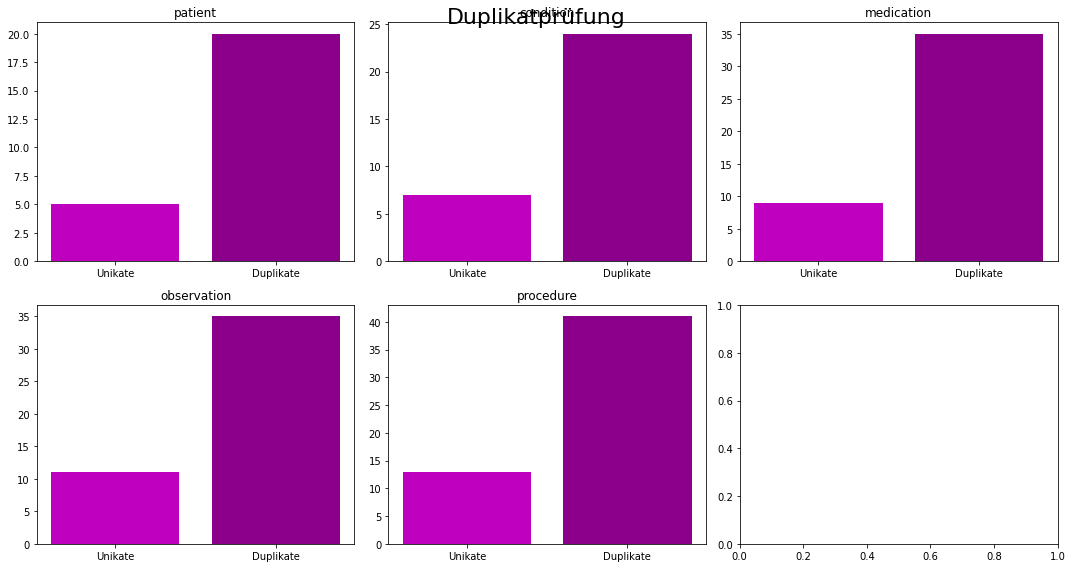

In [49]:
#patient['Id'].duplicated()
Duplikate = 0; Unikate = 0

print("Tabelle 'patient'")
p_l = []
for i in range(len(list(patient.columns.values))):
  print("Duplikate in", list(patient.columns.values)[i], "enthalten: ", not patient[list(patient.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  p_l.append(not patient[list(patient.columns.values)[i]].is_unique)
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values = [Unikate,Duplikate]


print("\n\nTabelle 'condition'")
c_l = []  
for i in range(len(list(condition.columns.values))):
  print("Duplikate in", list(condition.columns.values)[i], "enthalten: ", not condition[list(condition.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  c_l.append(not condition[list(condition.columns.values)[i]].is_unique)
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_1 = [Unikate,Duplikate]

print("\n\nTabelle 'medication'") 
m_l = []
for i in range(len(list(medication.columns.values))):
  print("Duplikate in", list(medication.columns.values)[i], "enthalten: ", not medication[list(medication.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  m_l.append(not medication[list(medication.columns.values)[i]].is_unique)
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_2 = [Unikate,Duplikate]

print("\n\nTabelle 'observation'") 
o_l = []
for i in range(len(list(observation.columns.values))):
  print("Duplikate in", list(observation.columns.values)[i], "enthalten: ", not observation[list(observation.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  o_l.append(not observation[list(observation.columns.values)[i]].is_unique)
  o_Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_3 = [Unikate,Duplikate]

print("\n\nTabelle 'procedure'") 
pr_l = []
for i in range(len(list(procedure.columns.values))):
  print("Duplikate in", list(procedure.columns.values)[i], "enthalten: ", not procedure[list(procedure.columns.values)[i]].is_unique) # not damit Duplikate und nicht Unikate angezeigt werden
  pr_l.append(not procedure[list(procedure.columns.values)[i]].is_unique)
  Duplikate = Duplikate + (not patient[list(patient.columns.values)[i]].is_unique)
  Unikate = Unikate + patient[list(patient.columns.values)[i]].is_unique
values_4 = [Unikate,Duplikate]


names = ['Unikate', 'Duplikate']
fig, ax = plt.subplots(2, 3, figsize=(15,8))

ax[0,0].bar(names, values,   color=['m', 'darkmagenta'])
ax[0,1].bar(names, values_1, color=['m', 'darkmagenta'])
ax[0,2].bar(names, values_2, color=['m', 'darkmagenta'])
ax[1,0].bar(names, values_3, color=['m', 'darkmagenta'])
ax[1,1].bar(names, values_4, color=['m', 'darkmagenta'])
ax[0,0].set_title('patient')
ax[0,1].set_title('condition')
ax[0,2].set_title('medication')
ax[1,0].set_title('observation')
ax[1,1].set_title('procedure')

plt.suptitle('Duplikatprüfung', fontsize=22)
plt.subplots_adjust(top=0.9)
plt.show()

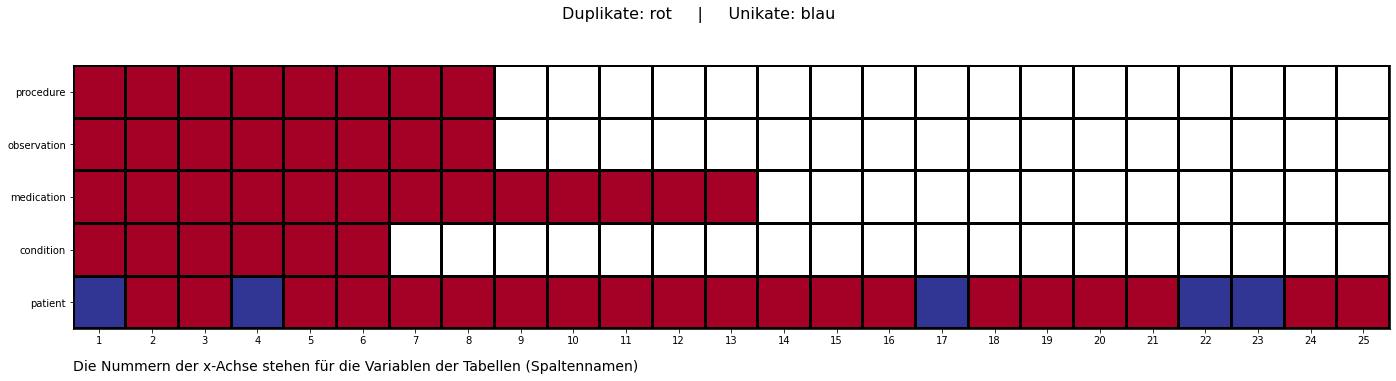

In [50]:
axa =  pd.DataFrame(data=(p_l,c_l,m_l,o_l,pr_l))
#np.shape(axa)
#axa.head()
axa = axa.astype('float')
#axa.dtypes

plt.rcParams["figure.figsize"] = [19.50, 5.50]
plt.rcParams["figure.autolayout"] = True

data = axa
fig = plt.figure()
ax = fig.add_subplot(111)
ax.pcolormesh(data, cmap='RdYlBu_r', edgecolors='k', linewidth=2) 


ax = plt.gca()
ax.set_aspect('equal')


fig.suptitle('Duplikate: rot     |     Unikate: blau', fontsize=16)
x_label_list = list(range(1,26,1)) 
y_label_list = ['patient', 'condition', 'medication', 'observation', 'procedure']

Liste = list(range(0,25,1))
Fließ = [float(x)+0.5 for x in Liste]
ax.set_xticks(Fließ)
ax.set_yticks([0.5, 1.5, 2.5, 3.5, 4.5])

ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)

plt.text(0, -0.8, "Die Nummern der x-Achse stehen für die Variablen der Tabellen (Spaltennamen)", fontsize=14)

plt.show()

# 3.4 Tabellen joinen

In [51]:
Neu_Tab = patient.join(condition.set_index('PATIENT'), on='Id').join(procedure.set_index('PATIENT'), on='Id', lsuffix='_condition', rsuffix='_procedure').join(medication.set_index('PATIENT'), on='Id', rsuffix='_medication').join(observation.set_index('PATIENT'), on='Id', rsuffix='_observation') 
Neu_Tab.head()


,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,TOTALCOST,REASONCODE_medication,REASONDESCRIPTION_medication,DATE_observation,ENCOUNTER_observation,CODE_observation,DESCRIPTION_observation,VALUE,UNITS,TYPE
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2010-06-22T10:47:46Z,NaN,QALY,QALY,53.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2011-06-22T10:47:46Z,NaN,QALY,QALY,54.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2012-06-22T10:47:46Z,NaN,QALY,QALY,55.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2013-06-22T10:47:46Z,NaN,QALY,QALY,56.0,a,numeric
0,d2061cc7-bee0-0e6c-3ac4-15c197c474e0,1956-06-22,NaN,999-51-6528,S99944910,X29408602X,Mr.,Lucio648,Simonis280,NaN,...,1472.58,NaN,NaN,2014-06-22T10:47:46Z,NaN,QALY,QALY,57.0,a,numeric


In [52]:
#Neu_Tab.to_csv('Neu_Tab.csv')
list(Neu_Tab.columns.values)

['Id',
 'BIRTHDATE',
 'DEATHDATE',
 'SSN',
 'DRIVERS',
 'PASSPORT',
 'PREFIX',
 'FIRST',
 'LAST',
 'SUFFIX',
 'MAIDEN',
 'MARITAL',
 'RACE',
 'ETHNICITY',
 'GENDER',
 'BIRTHPLACE',
 'ADDRESS',
 'CITY',
 'STATE',
 'COUNTY',
 'ZIP',
 'LAT',
 'LON',
 'HEALTHCARE_EXPENSES',
 'HEALTHCARE_COVERAGE',
 'START',
 'STOP',
 'ENCOUNTER_condition',
 'CODE_condition',
 'DESCRIPTION_condition',
 'DATE',
 'ENCOUNTER_procedure',
 'CODE_procedure',
 'DESCRIPTION_procedure',
 'BASE_COST',
 'REASONCODE',
 'REASONDESCRIPTION',
 'START_medication',
 'STOP_medication',
 'PAYER',
 'ENCOUNTER',
 'CODE',
 'DESCRIPTION',
 'BASE_COST_medication',
 'PAYER_COVERAGE',
 'DISPENSES',
 'TOTALCOST',
 'REASONCODE_medication',
 'REASONDESCRIPTION_medication',
 'DATE_observation',
 'ENCOUNTER_observation',
 'CODE_observation',
 'DESCRIPTION_observation',
 'VALUE',
 'UNITS',
 'TYPE']

In [53]:
fig = px.box(Neu_Tab, y="TOTALCOST" )

fig.show()

